# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.001
0.001
0.002
0.002
0.002
0.002
0.001
0.0
-0.001
0.0
-0.001
0.0
0.0
-0.002
-0.001
0.997
1.001
1.0
0.998
0.999
1.995
2.0
1.999
1.999
2.0
2.994
2.998
2.998
2.997
2.997
3.995
3.999
3.999
3.997
3.997
4.993
4.995
4.997
4.995
4.996
5.992
5.994
5.995
5.993
5.994
6.686
6.69
6.69
6.688
6.688
7.386
7.39
7.389
7.388
7.389
8.385
8.39
8.39
8.389
8.388
9.384
9.388
9.388
9.386
9.387
10.381
10.387
10.387
10.386
10.385
11.381
11.385
11.385
11.384
11.384
12.379
12.383
12.383
12.382
12.383
13.377
13.382
13.382
13.382
13.382
13.99
13.994
13.994
13.994
13.994
13.994
14.61
14.608
14.609
15.604
15.608
15.608
15.608
15.608
16.605
16.609
16.609
16.607
16.609
17.609
17.608
17.608
17.608
18.604
18.604
18.609
18.607
18.609
19.609
19.608
19.607
19.607
20.608
20.608
20.607
20.608
21.499
21.503
21.502
21.502
21.502
22.395
22.395
22.394
22.394
23.394
23.394
23.392
23.392
24.391
24.39
24.388
24.388
25.388
25.388
25.386
25.386
26.386
26.386
26.384
26.384
27.

57.151
57.15
57.149
57.149
57.149
57.149
57.149
57.148
57.148
57.148
57.148
57.241
57.241
57.318
57.318
57.39
57.39
57.39
57.39
57.465
57.465
57.465
57.465
57.465
57.538
57.538
57.538
57.537
57.537
57.537
57.538
57.538
57.537
57.537
57.537
57.537
57.536
57.536
57.536
57.536
57.536
57.536
57.536
57.536
57.535
57.534
57.534
57.534
57.534
57.534
57.534
57.534
57.532
57.532
57.532
57.532
57.532
57.532
57.532
57.532
57.533
57.533
57.533
57.533
57.533
57.533
57.533
57.533
57.533
57.531
57.531
57.883
57.883
57.883
57.883
57.881
57.885
57.884
57.883
57.882
57.882
57.882
57.882
57.881
57.881
57.88
57.88
57.88
57.88
57.879
57.879
57.879
57.879
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.878
57.876
57.875
57.875
57.875
57.962
57.962
58.039
58.039
58.11
58.11
58.11
58.11
58.184
58.184
58.183
58.183
58.182
58.253
58.253
58.253
58.253
58.253
58.253
58.25
58.254
58.253
58.253
58.253
58.253
58.251
58.25
58.25
5

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1429,2858,60.171
1430,2860,60.171
1431,2862,60.171
1432,2864,60.171


<IPython.core.display.Javascript object>


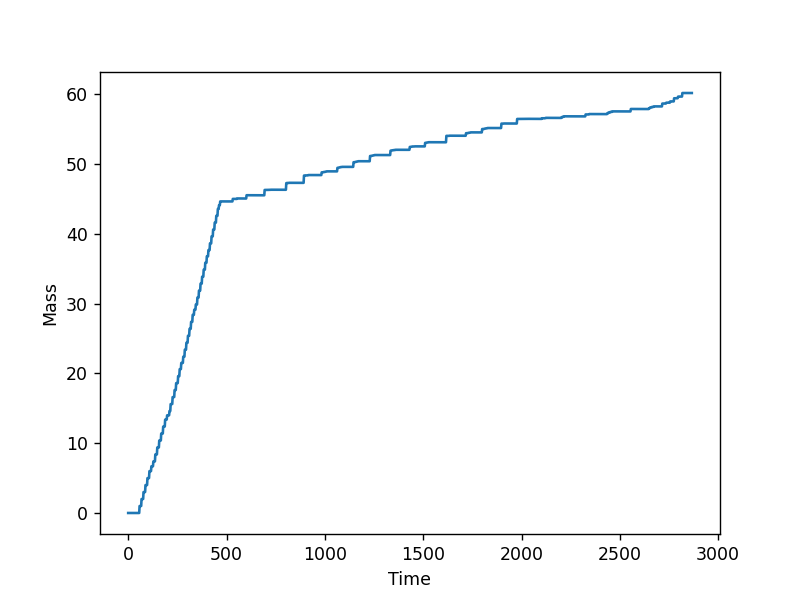

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_120623_S595-600.csv')